# Deep Neural Netowrk - Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
import sys

sys.path.append('./neural-networks/')

from loss.mean_squared_error import MeanSquaredError
from operation.activation.linear import Linear
from operation.activation.sigmoid import Sigmoid
from layer.dense_layer import Dense
from nn.neural_network import NeuralNetwork
from trainer.trainer import Trainer
from optimizer.sgd import SGD
from utils.utils import to_2d

## Data

### Load Data

In [3]:
diabetes_dataset = load_diabetes()
data = diabetes_dataset.data
target = diabetes_dataset.target

In [4]:
features = diabetes_dataset.feature_names
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### Prepare Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

In [6]:
y_train, y_test = to_2d(y_train), to_2d(y_test)

## Model Evaluation

In [7]:
def mae(predictions, y_test):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(predictions - y_test))

def rmse(predictions, y_test):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(predictions - y_test, 2)))

In [8]:
def eval_model(model : NeuralNetwork,
                X_test : np.ndarray,
                y_test : np.ndarray):
    '''
    Compute mae and rmse for a neural network.
    '''
    preds = model.forward(X_test)
    preds = preds.reshape(-1, 1)

    print("Mean absolute error: {:.2f}".format(mae(preds, y_test)))
    print()
    print("Root mean squared error {:.2f}".format(rmse(preds, y_test)))

In [9]:
def plot(model, X_test, y_test):
    preds = model.forward(X_test)
    preds = preds.reshape(-1, 1)

    plt.xlabel("Predicted value")
    plt.ylabel("Target")
    plt.title("Predicted value vs. target,\n neural network regression")
    plt.scatter(preds, y_test)

## Declare Some Neural Network

### Linear Regression

In [10]:
linear_regression = NeuralNetwork(
    layers=[
        Dense(neurons=1, activation=Linear())
    ],
    loss=MeanSquaredError(),
    seed=20190501
)

In [11]:
trainer = Trainer(linear_regression, SGD(lr=0.01))

In [12]:
trainer.fit(
    X_train,
    y_train,
    X_test,
    y_test,
    epochs=100,
    eval_every=10,
    seed=20190501)

Validation loss after 10 epochs is 6515.883
Validation loss after 20 epochs is 5934.496
Validation loss after 30 epochs is 5840.589
Validation loss after 40 epochs is 5770.440
Validation loss after 50 epochs is 5703.059
Validation loss after 60 epochs is 5637.455
Validation loss after 70 epochs is 5578.504
Validation loss after 80 epochs is 5520.762
Validation loss after 90 epochs is 5461.046
Validation loss after 100 epochs is 5404.740


In [13]:
eval_model(linear_regression, X_test, y_test)

Mean absolute error: 64.29

Root mean squared error 73.52


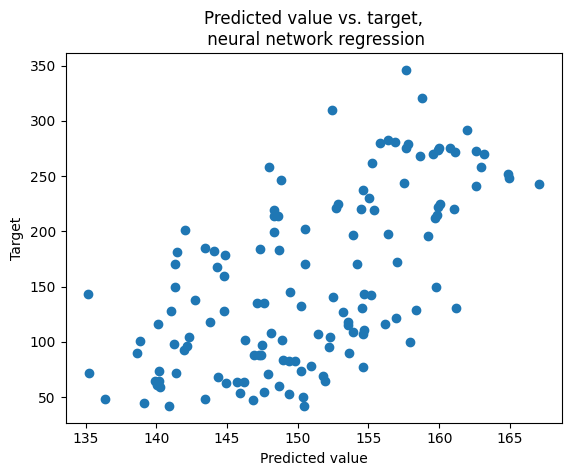

In [14]:
plot(linear_regression, X_test, y_test)

### Deep Neural Network

In [15]:
nn = NeuralNetwork(
    layers=[Dense(neurons=13, activation=Sigmoid()),
            Dense(neurons=10, activation=Sigmoid()),
            Dense(neurons=13, activation=Sigmoid()),
            Dense(neurons=15, activation=Sigmoid()),
            Dense(neurons=13, activation=Sigmoid()),
            Dense(neurons=1, activation=Linear())],
    loss=MeanSquaredError(),
    seed=20190501
)

In [16]:
trainer = Trainer(nn, SGD(lr=0.01))
trainer.fit(X_train, y_train, X_test, y_test,
       epochs=500,
       eval_every=10,
       seed=20190501,
       early_stopping=False)

Validation loss after 10 epochs is 6042.980
Validation loss after 20 epochs is 6046.732
Validation loss after 30 epochs is 6083.404
Validation loss after 40 epochs is 6041.051
Validation loss after 50 epochs is 6045.433
Validation loss after 60 epochs is 6047.726
Validation loss after 70 epochs is 6040.851
Validation loss after 80 epochs is 6089.069
Validation loss after 90 epochs is 6120.953
Validation loss after 100 epochs is 6072.691
Validation loss after 110 epochs is 6042.367
Validation loss after 120 epochs is 6073.405
Validation loss after 130 epochs is 6049.239
Validation loss after 140 epochs is 6085.956
Validation loss after 150 epochs is 6025.540
Validation loss after 160 epochs is 6078.215
Validation loss after 170 epochs is 6082.446
Validation loss after 180 epochs is 6042.531
Validation loss after 190 epochs is 6042.852
Validation loss after 200 epochs is 6182.540
Validation loss after 210 epochs is 6042.726
Validation loss after 220 epochs is 6058.362
Validation loss aft

In [17]:
eval_model(nn, X_test, y_test)

Mean absolute error: 67.42

Root mean squared error 77.88


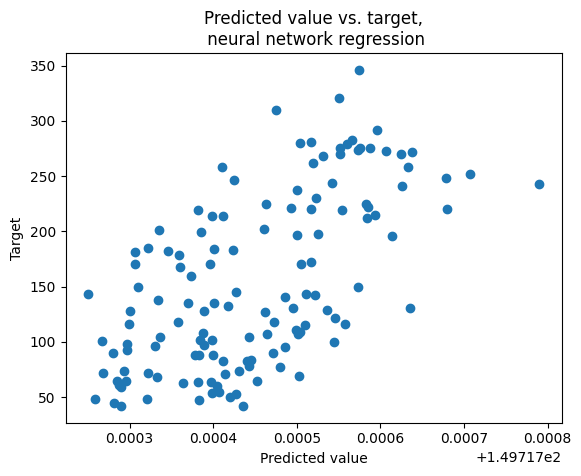

In [18]:
plot(nn, X_test, y_test)